In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from scipy.stats import zscore

In [145]:
# read in forest fires dataset into a pandas dataframe
df = pd.read_csv('forest-fires.csv')

# perform very basic analysis of the metadata (number of points and data types for each column)
print(df.shape)
print(df.dtypes)
df.describe().T

(517, 13)
x          int64
y          int64
month     object
day       object
ffmc     float64
dmc      float64
dc       float64
isi      float64
temp     float64
rh         int64
wind     float64
rain     float64
area     float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
x,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
ffmc,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
dmc,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
dc,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
isi,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
rh,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [146]:
# Inspect the first few data points to gain a brief understanding of the data
df.head()

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [147]:
# Find missing values and correct them in the dataset if needed
print(df.isna().sum().sum())

0


In [148]:
# Configure plotting library
plt.rcParams['figure.figsize'] = 9,5

In [149]:
# Analyze skew and kurtosis values
## Skewness: A measure of how skewed (non-symmetric) the data is relative to the midpoint.
print("Area skewness: {}".format(df['area'].skew()))
## Kurtosis: A measure of how heavy the tails are in the data (how many outliers there are)
print("Area kurtosis: {}".format(df['area'].kurtosis()))

Area skewness: 12.846933533934868
Area kurtosis: 194.1407210942299


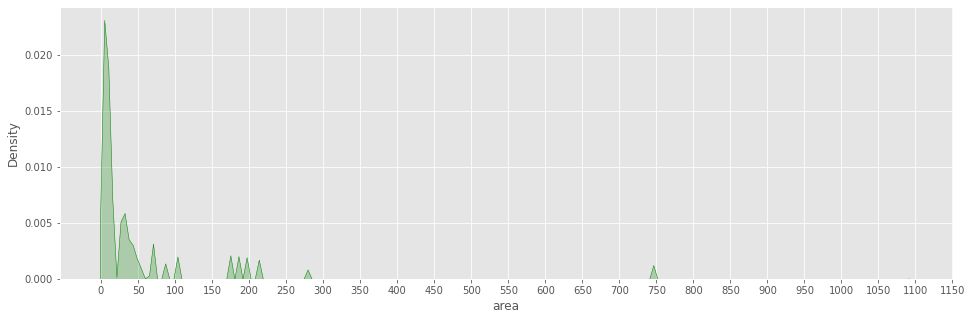

In [150]:
# Plot a Kernel Density Estimate of our data. This is essentially a histogram but it provides more useful insights.
plt.figure(figsize=(16,5))
ax = sns.kdeplot(df['area'],bw_adjust=0.02,shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

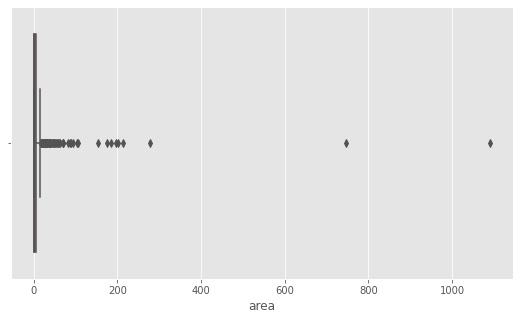

In [151]:
# Plot a boxplot of all the area values to find any outliers
ax = sns.boxplot(x=df['area'])

In [152]:
# Notes:
## The data is very skewed by the outliers.
## We see that most forest fires cover less than 50 hectacres of land.
## The main outliers have been identified below
outliers = df[abs(zscore(df['area'])) >= 3 ]
outliers

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [153]:
# Create a new dataframe without the area (for which we will later create a prediction model)
df_input = df.drop(columns='area')

# Split up the data columns into categorical columns and numerical columns
categorical = df_input.select_dtypes(include='object').columns.tolist()
numerical = df_input.select_dtypes(exclude='object').columns.tolist()

print(categorical)
print(numerical)

['month', 'day']
['x', 'y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']


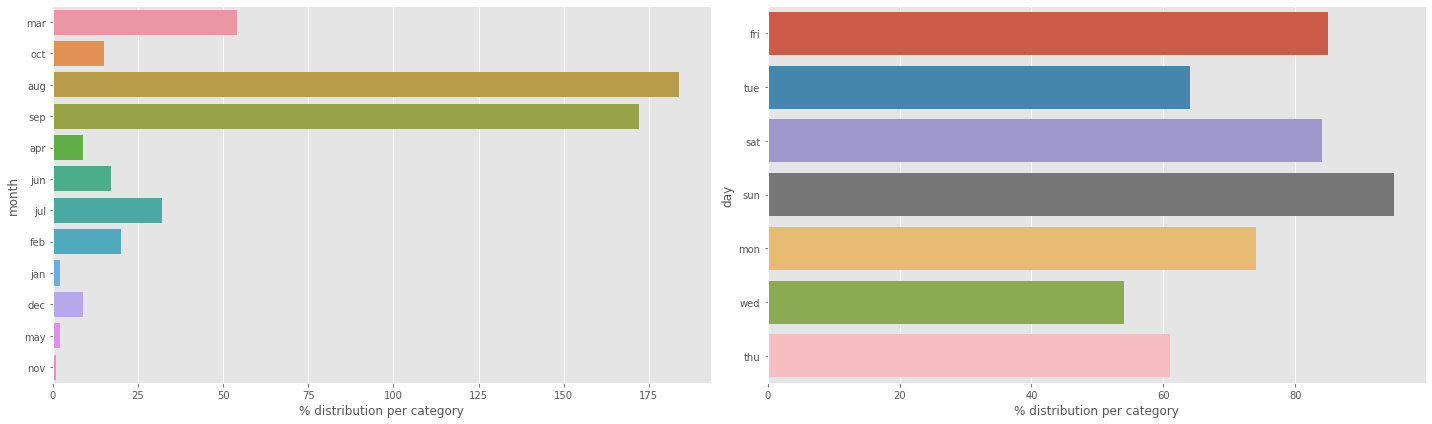

In [154]:
# Visualize categorical data
plt.figure(figsize=(20,6))
for index, cat_column in enumerate(categorical, start=1):
    plt.subplot(1,2,index)
    sns.countplot(data=df_input,y=cat_column)
    plt.ylabel(cat_column)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [155]:
# We notice a huge spike in forest fires during August and September.
# Sunday seems to have more fires on avergae, but there seems to be little significant difference.

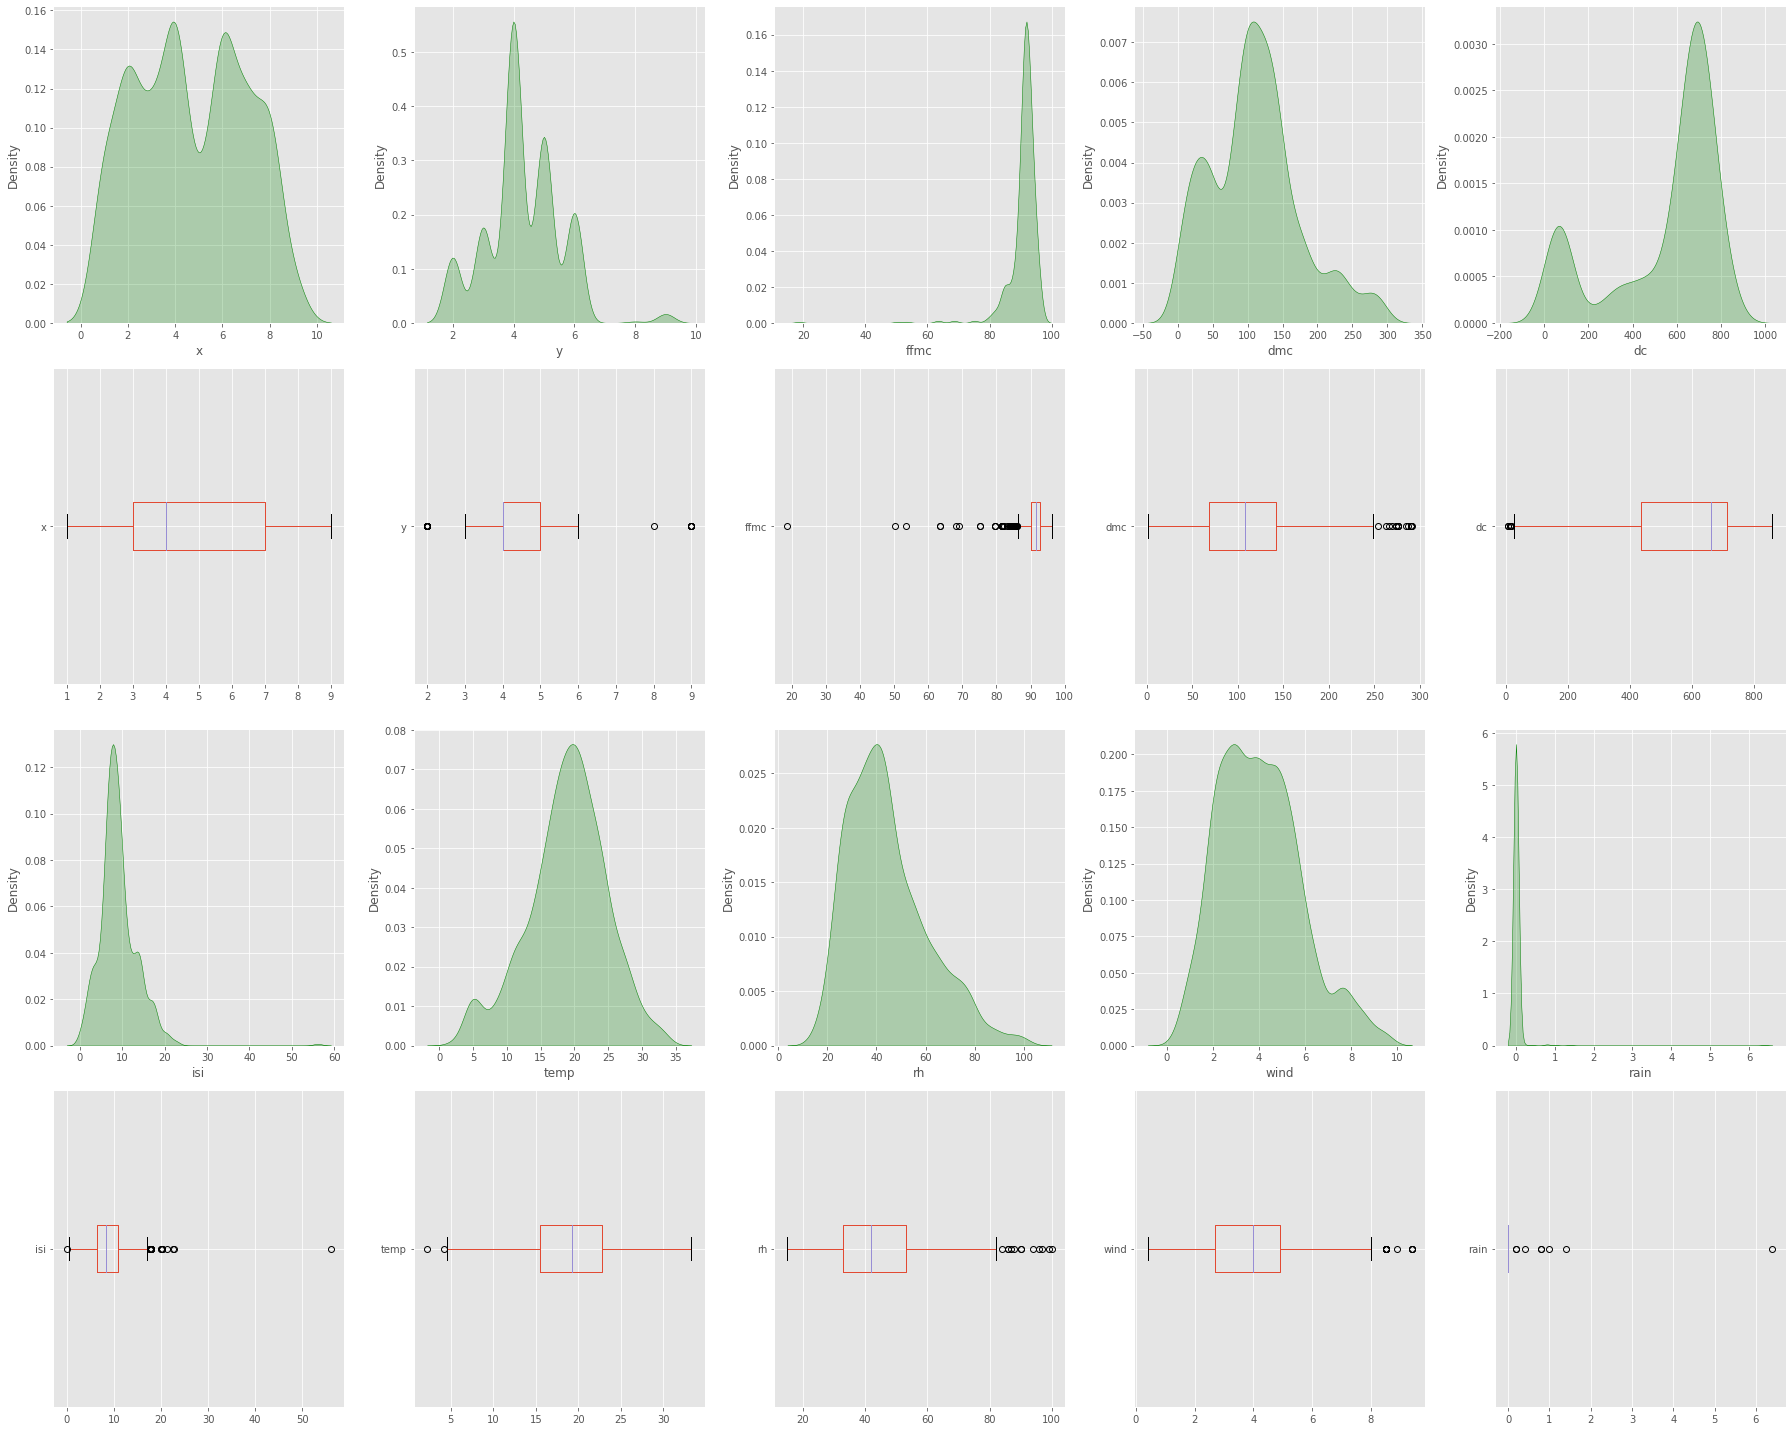

,x,y,ffmc,dmc,dc,isi,temp,rh,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [156]:
# Visualize numerical data
plt.figure(figsize=(25,20))
for index, num_column in enumerate(numerical, start=1):
    plot_index = index+5 if index > 5 else index
    plt.subplot(4,5,plot_index)
    sns.kdeplot(data=df[num_column],bw_adjust=0.8,color='g',shade=True)
    plt.subplot(4,5,plot_index+5)
    df[num_column].plot.box(vert=False)
plt.tight_layout()
plt.show()
numerical_data = df[numerical]
pd.DataFrame(data=[numerical_data.skew(),numerical_data.kurtosis()],index=['skewness','kurtosis'])

In [157]:
# Notes:
## The KDE plots and box plots reveal that there is the most skew and kurtosis in FFMC, ISI, and rain
## These columns also had the most extreme outliers.

In [158]:
# Create catergorical representations of the damage from forest fires based on area
def damage_level(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_level'] = df['area'].apply(damage_level)
df.head()

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,damage_level
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


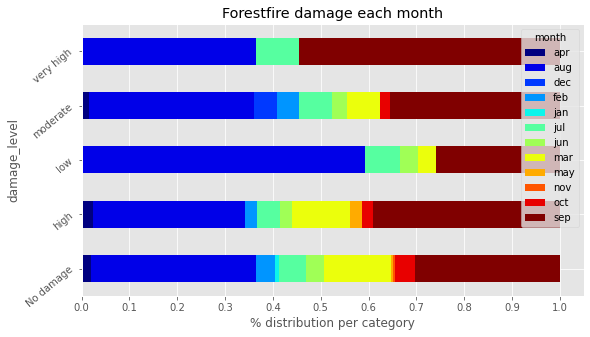

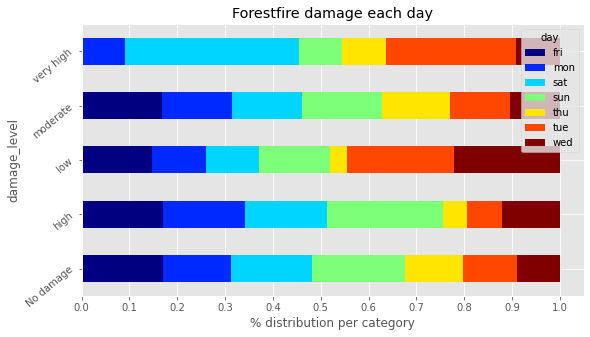

In [159]:
# Visualize the damage level with respect to the month and day of the event
for index, category in enumerate(categorical, start=1):
    cross = pd.crosstab(index=df['damage_level'],columns=df[category],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='jet')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(category))
plt.show()

In [160]:
# Notes:
## This reveals that although august and september had the most fires, many of them were relatively low damage.
## Furthermore, we can notice that every high damage fire happened within three months: July, August, September.
## May, April, November, and December had almost no fires, which coincides with our previous visualization that did't factor in damage done.
## The by day graph provides little valueable insight, since almost every dy has an even amount of each damage level.

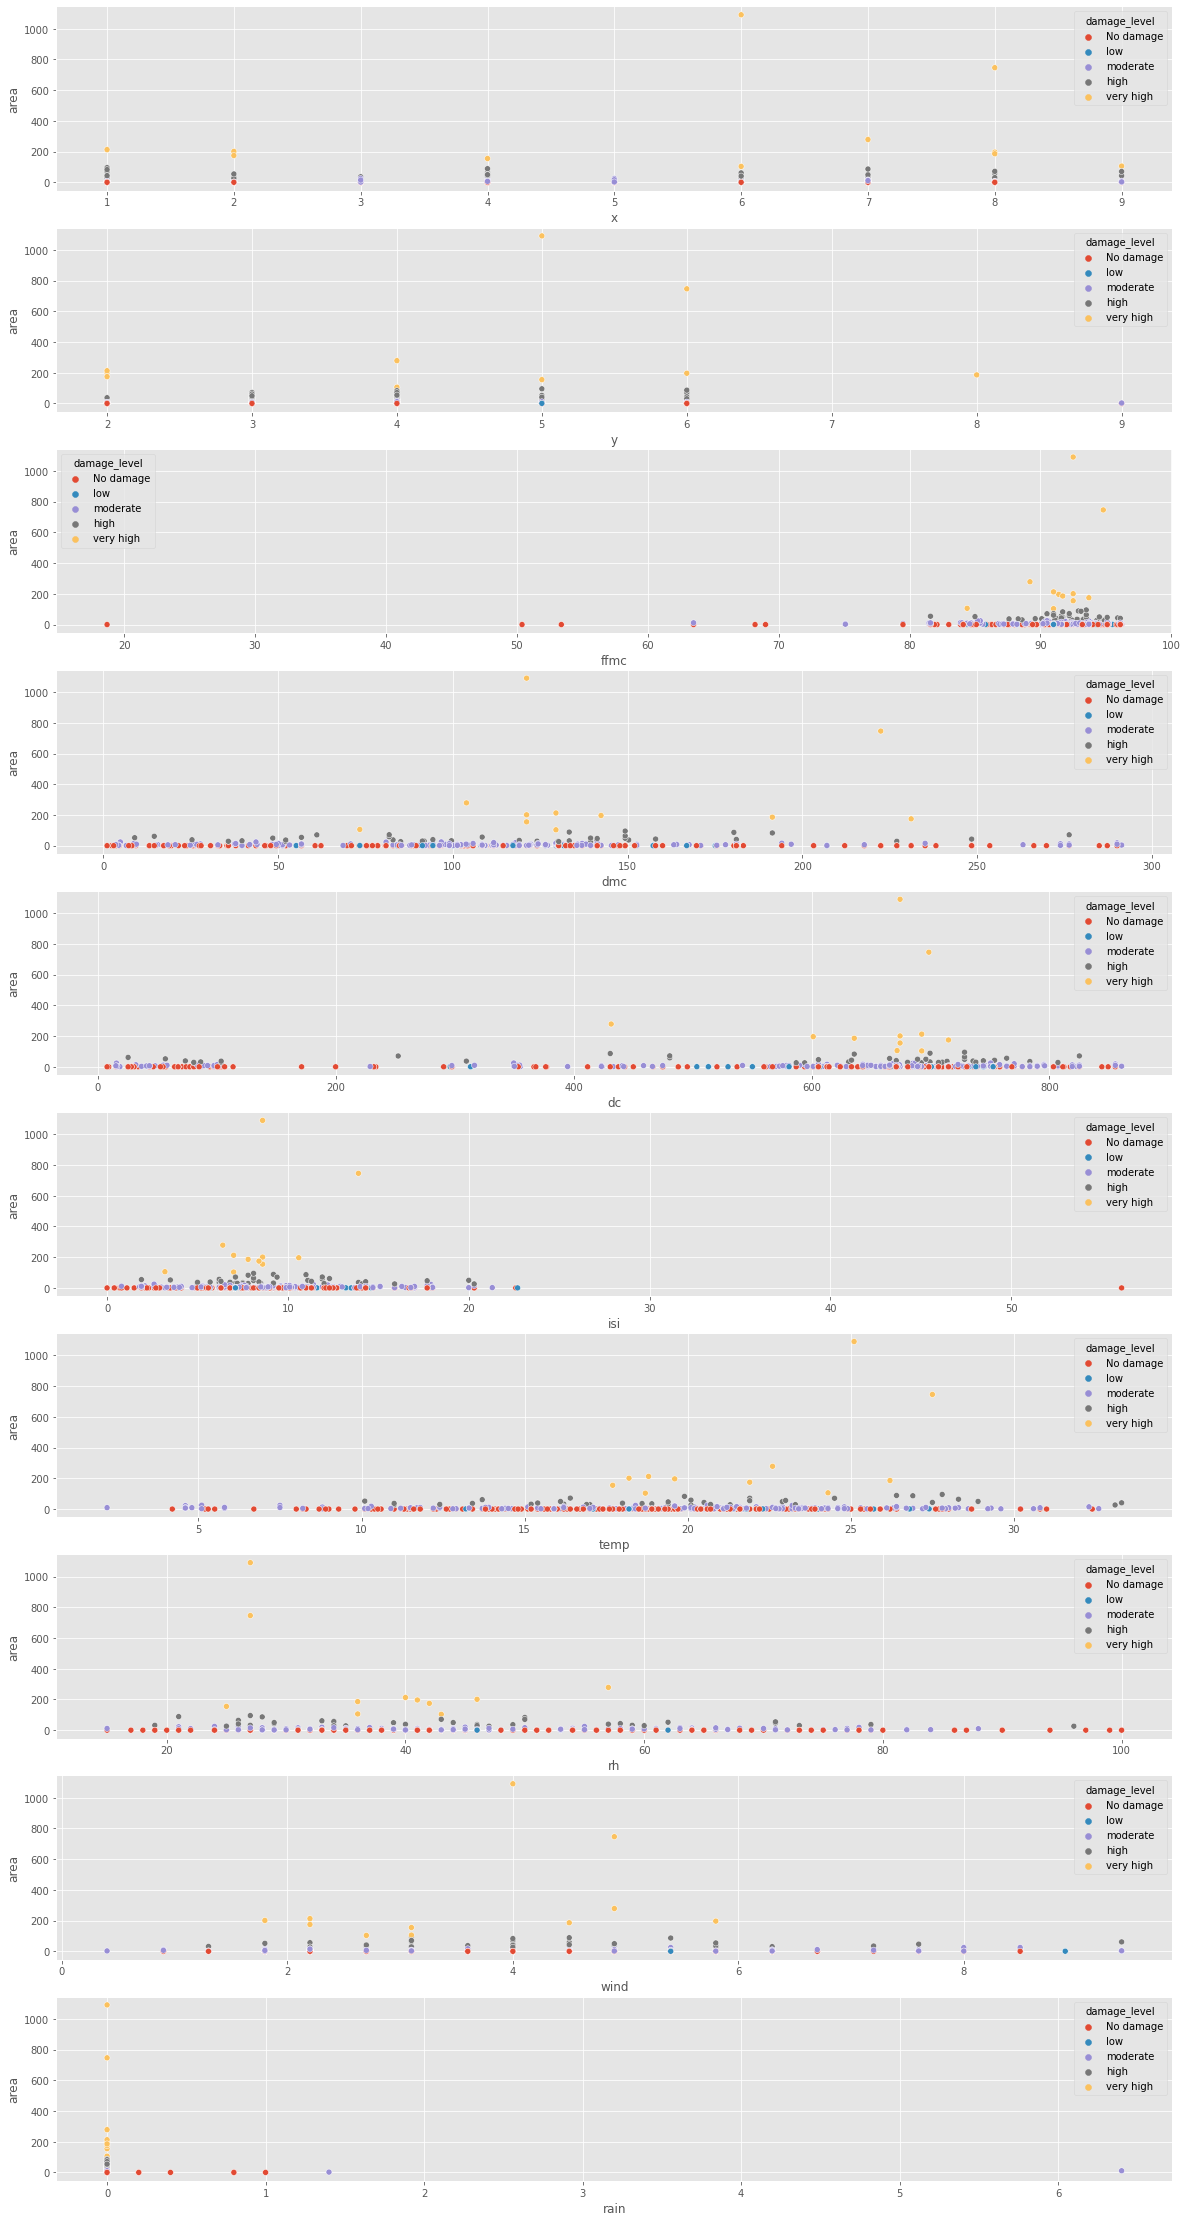

In [161]:
# Visualize the damage level with respect to the numerical columns of the data
plt.figure(figsize=(20,40))
for index, category in enumerate(numerical, start=1):
    plt.subplot(10,1,index)
    if category in ['X','Y']:
        sns.swarmplot(data=df,x=category,y='area',hue='damage_level')
    else:
        sns.scatterplot(data=df,x=category,y='area',hue='damage_level')
plt.show()